# DATASCI 217 ASSIGNMENT 7 : DATA VISUALIZATION

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read CSV Files

In [2]:
df_bfa = pd.read_csv("/Users/seonminkim/Documents/DATASCI217/07-visualization-EstherKim97/ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-bfa--age--gender--year.csv")
df_bel = pd.read_csv("/Users/seonminkim/Documents/DATASCI217/07-visualization-EstherKim97/ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-bel--age--gender--year.csv")
df_sen = pd.read_csv("/Users/seonminkim/Documents/DATASCI217/07-visualization-EstherKim97/ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-sen--age--gender--year.csv")
df_aus = pd.read_csv("/Users/seonminkim/Documents/DATASCI217/07-visualization-EstherKim97/ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-aus--age--gender--year.csv")
df_vct = pd.read_csv("/Users/seonminkim/Documents/DATASCI217/07-visualization-EstherKim97/ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-vct--age--gender--year.csv")

## Part 1: Matplotlib

In [3]:
# Make a data frame with 5 country data
df = pd.concat([df_bfa, df_bel, df_sen, df_aus, df_vct])

### 1. Line plot comparing total population over time in 5 chosen countries

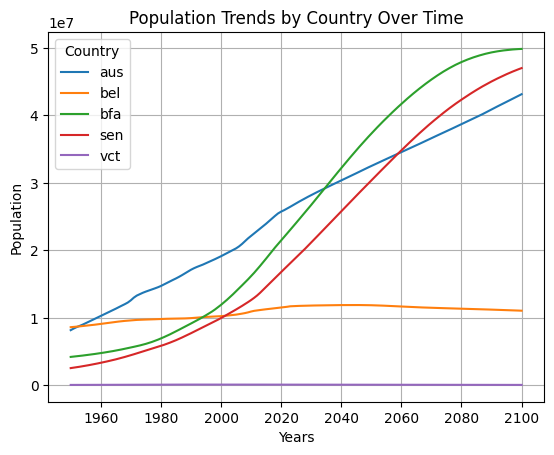

In [4]:
# The total population by country for each year 
total_pop = df.groupby(["country", "year"])["population"].sum().reset_index()

for country in total_pop["country"].unique():
    country_data = total_pop[total_pop["country"] == country]
    plt.plot(country_data["year"], country_data["population"], label=country)

plt.grid()
plt.plot(figsize=(10, 6))
plt.title("Population Trends by Country Over Time")
plt.xlabel("Years")
plt.ylabel("Population")
plt.legend(title="Country")
plt.cm.Set2

plt.show()

### 2. A stacked bar chart showing demographic shifts between 1950, 1985, and 2020

In [ ]:
df["age_dis"] = ""

# Define age range categories and counts
df_age_count = pd.DataFrame({
    "age_category" : ["0-14", "15-30", "31-45", "46-65", "66+"],
    "count" : [0] * 5
})

# Loop through each row and assign age distribution categories
for i in range(len(df["age"])):
    age = df["age"].iloc[i]
    
    if 0 <= age <= 14:
        df["age_dis"].iloc[i] = "0-14"
        df_age_count.loc[df_age_count["age_category"] == "0-14", "count"] += 1
    elif 15 <= age <= 30:
        df["age_dis"].iloc[i] = "15-30"
        df_age_count.loc[df_age_count["age_category"] == "15-30", "count"] += 1
    elif 31 <= age <= 45:
        df["age_dis"].iloc[i] = "31-45"
        df_age_count.loc[df_age_count["age_category"] == "31-45", "count"] += 1
    elif 46 <= age <= 65:
        df["age_dis"].iloc[i] = "46-65"
        df_age_count.loc[df_age_count["age_category"] == "46-65", "count"] += 1
    else:
        df["age_dis"].iloc[i] = "66+"
        df_age_count.loc[df_age_count["age_category"] == "66+", "count"] += 1

In [ ]:
# Graph bar plot
filtered_df = df[df["year"].isin([1950, 1985, 2020])]

age_distri = filtered_df[filtered_df["country"]=="aus"].groupby(["year", "age_dis"])["population"].sum().unstack(fill_value=0)
total_pop = df_age_count["count"].sum()

bar_plot = age_distri.plot(kind = "bar", stacked=True)


for i in range(len(age_distri)):
    cumulative = 0
    for j, age_category in enumerate(df_age_count["age_category"]):
        count = df_age_count.loc[df_age_count["age_category"] == age_category, "count"].values[0]
        if count > 0: 
            proportion = (count / total_pop) * 100
        bar_plot.text(i, cumulative+count, f"{proportion:.1f}%", ha="center", va="center", color="black", fontsize=10)
        cumulative += count
        
plt.plot(figsize=(10, 6))
plt.title("Age Distribution Bar Plot for 1950, 1985, 2020 Years")
plt.xlabel("Year")
plt.ylabel("Population")
plt.legend(title="Age Distribution")
plt.cm.Set2
        
plt.show()

## Part 2: Seaborn

### 1. A heatmap showing population distribution across age groups

In [ ]:
year_of_interest = 1950
filtered_year = []
heat_data = []


filtered_year = df[df["year"] == year_of_interest]
heat_data = filtered_year.groupby(["country", "age_dis"])["population"].sum().unstack(fill_value=0)

heatmap = sns.heatmap(heat_data, annot=True, fmt=".1g", cmap= "coolwarm")
heatmap.invert_yaxis()

plt.xlabel("Age Distribution")
plt.ylabel("Countries")
plt.title("Heatmap of Age Distribution for 5 Countries")

plt.show()

#### Brief Explanation on heatmap

Heatmap is plotted against 5 countries (Australia, Belgium, Bukina Faso, Senegal, Saint Vincent and the Grenadines) and age distribution. Saint Vincent and the Grenadines has similar population across the age distribution. In contrast, all the other four countries have higher population at younger age distribution criteria and decreases as age category increases. 

### 2. A violin plots comparing the age distributions between two countries in 2020, seperated by gender

In [ ]:
# Dataset for Violin Plot

year_of_interest = 2020

filtered_year = df[df["year"] == year_of_interest]
filtered_year_data = filtered_year[filtered_year["country"].isin(["aus", "bel"])]

violin_data = filtered_year_data.groupby(["country", "age", "gender"])["population"].sum().reset_index()

# Plotting violin plots
sns.violinplot(x = "country", y = "age", hue = "gender", split = True, data = violin_data)

sns.color_palette("husl", 8)
sns.set_style("whitegrid")

plt.ylabel("Age Distribution")
plt.xlabel("Country")
plt.title("Viloin Plot for Age distribution of Belgium and Australia")

#### Brief Explanation of Violin Plot

This violin plot shows that the gender ratio between male and female in Australia and Belgium are very similar to each other as shown in similar shape.

### 3. A pairplot comparing population across 4 countries

In [ ]:
pairplot_data = df[df["country"].isin(["bfa", "vct", "bel", "aus"])]

sns.pairplot(pairplot_data, hue = "country")
plt.show()

#### Brief Explanation on pairplot

The pairplot shows the relationship against age, gender, year and population to each other. We can see from the graph that the population decreases as age increases and that the population for both gender in relatively the same in each countries. Also, the pairplot showing population and year shows the increase in overall population. 